In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes = True)

In [58]:
df = pd.read_csv('/content/drive/MyDrive/Coding/Bootcamp/Scholarship/Mall_Customers.csv')

In [59]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [142]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [65]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


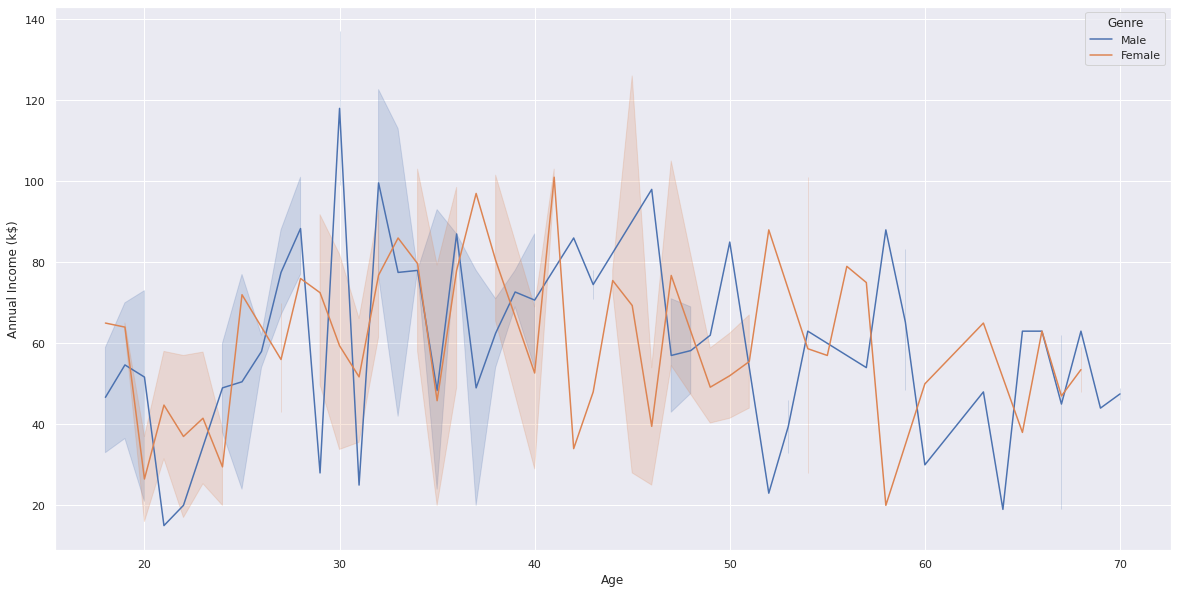

In [66]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = df['Age'], y = df['Annual Income (k$)'], hue = df['Genre'])
plt.show()

Dapat kita lihat bahwa pria berusia muda yang berbelanja di mall cenderung lebih memiliki annual income yang lebih tinggi dibandingkan wanita berusia muda yang berbelanja di mall. Sementara itu, wanita berusia tua yang berbelanja di mall cenderung lebih memiliki annual income yang lebih tinggi dibandingkan pria berusia tua yang berbelanja di mall.

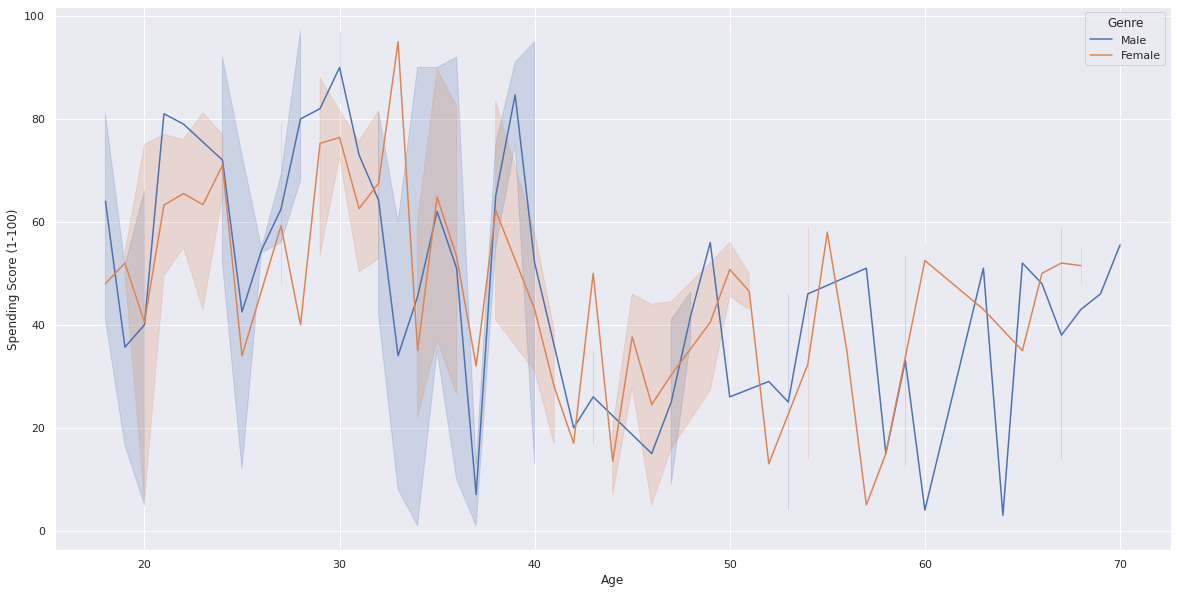

In [67]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = df['Age'], y = df['Spending Score (1-100)'], hue = df['Genre'])
plt.show()

Dapat kita lihat bahwa grafiknya menurun sehingga memiliki hubungan yang negatif. Maka dapat saya simpulkan bahwa baik wanita maupun pria berusia muda cenderung lebih mengeluarkan uang untuk berbelanja di mall dibandingkan dengan wanita maupun pria berusia tua.

<Figure size 1440x720 with 0 Axes>

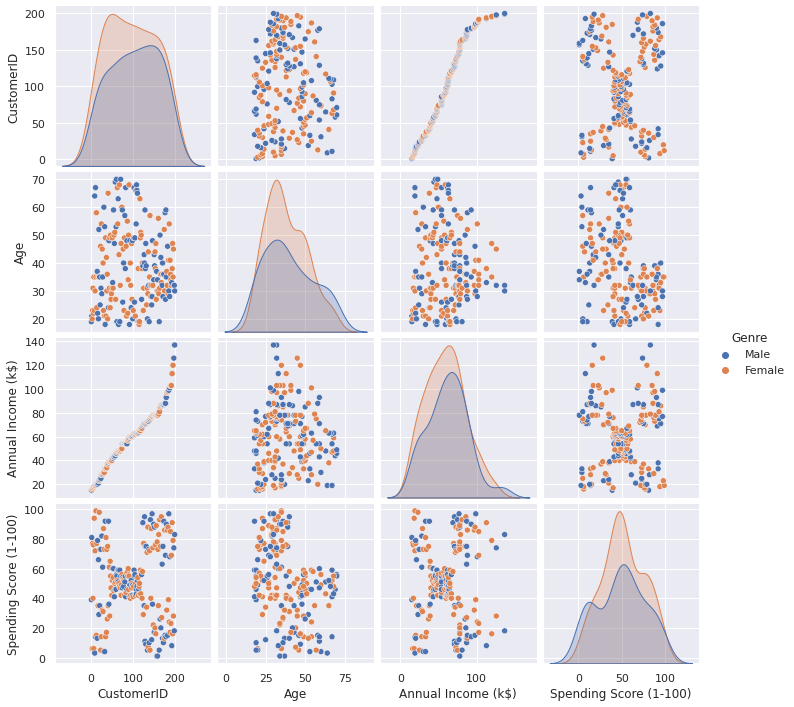

In [68]:
plt.figure(figsize = (20, 10))
sns.pairplot(data = df, hue = 'Genre')
plt.show()

Berdasarkan grafik diatas, dapat kita lihat bahwa distribusi untuk Genre 'Female' lebih banyak daripada 'Male'. Maka, disimpulkan bahwa lebih banyak wanita yang berbelanja di mall dibandingkan pria. 

Selain itu, dapat kita lihat bahwa hubungan antara Customer Id dengan Annual Income adalah kuat positif. Sedangkan, feature lain tidak memiliki hubungan yang kuat.

In [69]:
from sklearn.model_selection import train_test_split

X = df.drop(['Spending Score (1-100)'], axis = 1)
y = df['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160,)
(40,)


In [71]:
X_train.head()

,CustomerID,Genre,Age,Annual Income (k$)
134,135,Male,20,73
66,67,Female,43,48
26,27,Female,45,28
113,114,Male,19,64
168,169,Female,36,87


In [72]:
X_test.head()

,CustomerID,Genre,Age,Annual Income (k$)
18,19,Male,52,23
170,171,Male,40,87
107,108,Male,54,63
98,99,Male,48,61
177,178,Male,27,88


In [73]:
y_train.head()

134     5
66     50
26     32
113    46
168    27
Name: Spending Score (1-100), dtype: int64

In [74]:
y_test.head()

18     29
170    13
107    46
98     42
177    69
Name: Spending Score (1-100), dtype: int64

In [98]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
genre_train = pd.DataFrame(OH_encoder.fit_transform(X_train[['Genre']]))
genre_test = pd.DataFrame(OH_encoder.transform(X_test[['Genre']]))

genre_train.index = X_train.index
genre_test.index = X_test.index

num_X_train = X_train.drop(['Genre'], axis = 1)
num_X_test = X_test.drop(['Genre'], axis = 1)

OH_X_train = pd.concat([num_X_train, genre_train], axis = 1)
OH_X_test = pd.concat([num_X_test, genre_test], axis = 1)

In [99]:
OH_X_train

,CustomerID,Age,Annual Income (k$),0,1
134,135,20,73,0.0,1.0
66,67,43,48,1.0,0.0
26,27,45,28,1.0,0.0
113,114,19,64,0.0,1.0
168,169,36,87,1.0,0.0
...,...,...,...,...,...
67,68,68,48,1.0,0.0
192,193,33,113,0.0,1.0
117,118,49,65,1.0,0.0
47,48,27,40,1.0,0.0


In [100]:
OH_X_test

,CustomerID,Age,Annual Income (k$),0,1
18,19,52,23,0.0,1.0
170,171,40,87,0.0,1.0
107,108,54,63,0.0,1.0
98,99,48,61,0.0,1.0
177,178,27,88,0.0,1.0
182,183,46,98,0.0,1.0
5,6,22,17,1.0,0.0
146,147,48,77,0.0,1.0
12,13,58,20,1.0,0.0
152,153,44,78,1.0,0.0


In [123]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear') # menaikkan iterasi
model.fit(OH_X_train, y_train)

pred = model.predict(OH_X_test)
print(pred)

[14  5 46 46 10 46 77 46 14 43 79 42 42 43 46 77 81 46 42 55 86 75 42 78
 46 46  5 75 42 42 42 46 46 83 14 42 46  6 42 43]


In [112]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, pred)
MAE

21.125

In [113]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
MSE

899.525

In [114]:
RMSE = mean_squared_error(y_test, pred, squared = False)
RMSE

29.99208228849741

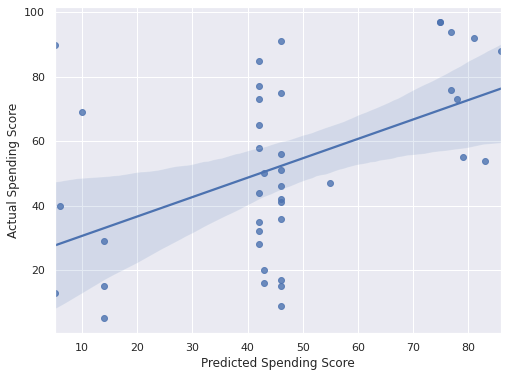

In [141]:
plt.figure(figsize = (8, 6))
sns.regplot(x = pred, y = y_test)
plt.xlabel('Predicted Spending Score')
plt.ylabel('Actual Spending Score')
plt.show()